**Linear Data**


In [146]:
import sys
print(sys.path)

['C:\\Program Files\\JetBrains\\PyCharm 2024.1.4\\plugins\\python\\helpers-pro\\jupyter_debug', 'C:\\Program Files\\JetBrains\\PyCharm 2024.1.4\\plugins\\python\\helpers\\pydev', '/root/temp_janis_test_parallellization', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/root/temp_janis_test_parallellization/hierarchicalcausalmodels', '/root/temp_janis_test_parallellization/hierarchicalcausalmodels', '/root/temp_janis_test_parallellization/hierarchicalcausalmodels']


In [147]:
from hierarchicalcausalmodels.models.HSCMParallel import HSCMParallel

In [148]:
import pandas as pd
import numpy as np
from hierarchicalcausalmodels.models.HSCM.HSCM import HSCM
import matplotlib.pyplot as plt
from scipy.stats import norm, expon



In [117]:

# Define the HSCM model structure
nodes = ["a", "b", "c", "d", "e"]
edges = [("a", "b"), ('a', 'c'), ("b", "c"), ("c", "d"), ("b", "d"), ("d", "e"),("c", "e")]
unit_nodes = ["a", "c", "e"]
subunit_nodes = ["d", "b"]
sizes = [150] * 150# You can adjust this based on your data

# Initialize the HSCM model
hscm = HSCM(nodes, edges, unit_nodes, subunit_nodes, sizes, node_functions={}, data=None)

# Define random functions for each node
random_functions = {
    "a": lambda x: norm.ppf(x, 0, 1),
    "b": lambda x: norm.ppf(x, 0, 1),
    "c": lambda x: norm.ppf(x, 0, 1),
    "d": lambda x: norm.ppf(x, 0, 1),
    "e": lambda x: norm.ppf(x, 0, 1)
}

# Define additive functions for each node
additive_functions = {
    "a": {},
    
    "b": {"a": lambda a: a},
    
    "c": {"a": lambda a: a**3, "b": lambda b: (np.mean(np.array(list(b))) +1)**2},
    
    "d": {"b": lambda b: b +1, "c": lambda c: -c},
    
    "e": {"d": lambda d: np.mean(np.array(list(d))) +1, "c": lambda c : np.sqrt(abs(c))}
}


In [118]:

# Set up the HSCM model
hscm.additive_model(additive_functions, random_functions)


In [119]:

# Sample data from the model
sampled_data = hscm.sample_data()


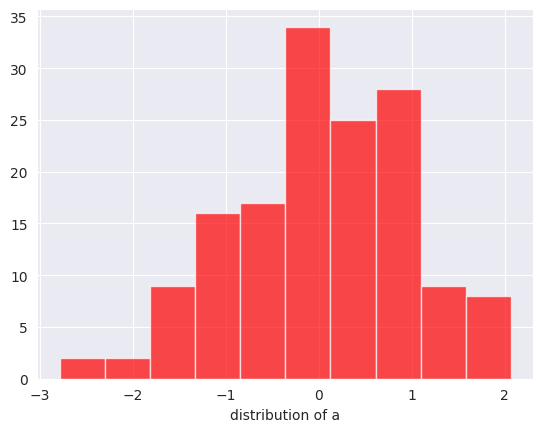

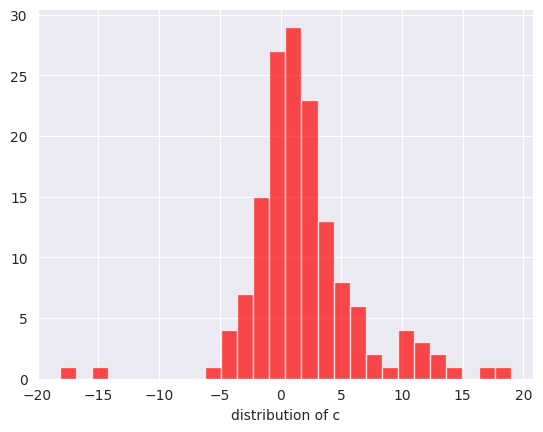

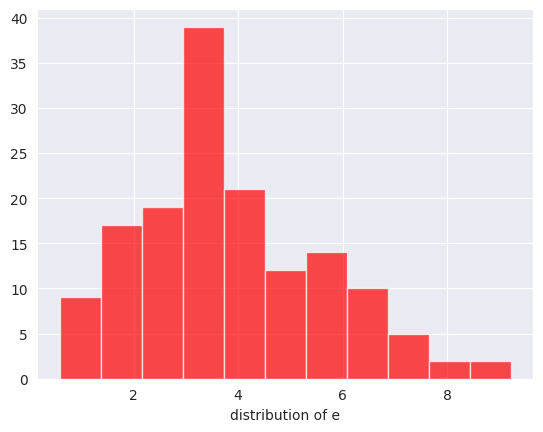

[[-1.022714455727883,
  0.628402540231324,
  -0.10291181323475618,
  0.9304307612313342,
  -1.0656722426909833,
  -2.7822197329759737,
  0.9079406578259813,
  -0.05320875943274519,
  1.5067323403855253,
  1.3312189839934376,
  -0.4421027348434702,
  0.6991270102543987,
  -0.6266094417324698,
  -1.0223316740903465,
  0.4130762334822648,
  1.4698497436101823,
  0.9982756964072548,
  -0.3292581591882242,
  -0.4618441309496009,
  -0.9685026447905021,
  1.378421642108167,
  -0.18198394690103276,
  0.9631839284053303,
  0.23040572592387593,
  1.069543976637561,
  -1.3213361014714007,
  -1.9495228373301807,
  0.5655367683578808,
  0.5770144374318814,
  -0.9935466551983507,
  -0.23468398587603684,
  -0.02246706594478572,
  0.009510056053669717,
  -0.8169722599832093,
  -0.8593988070199372,
  0.32240212627329945,
  -0.033547429041031536,
  -0.06641895639524546,
  0.6843283019399572,
  -1.706706106887504,
  0.2478176596892969,
  0.04057770209442668,
  0.5414732246511179,
  0.20561083836946864,
 

In [120]:

# Plot the sampled data
hscm.plot_data()


In [121]:
import json

# Function to save sampled data to a JSON file
def save_sampled_data(data, filename):
    with open(filename, 'w') as f:
        json.dump(data, f, indent=4)

# Save the sampled data
save_sampled_data(sampled_data, 'data/sampled_data.json')

print("Sampled data has been saved to 'sampled_data.json'")


Sampled data has been saved to 'sampled_data.json'


In [122]:

# Set distributions from the loaded data
hscm.set_distribution_from_data()


In [123]:
# Perform additional analysis or modify the model as needed
# For example, you can change the graph structure or random functions here

# Re-sample data after modifications
new_sampled_data = hscm.resample_data_no_intervention()


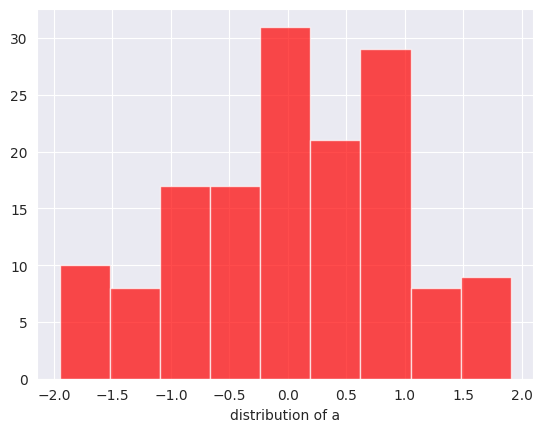

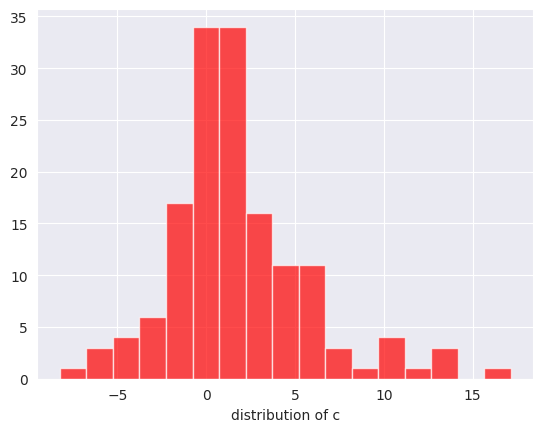

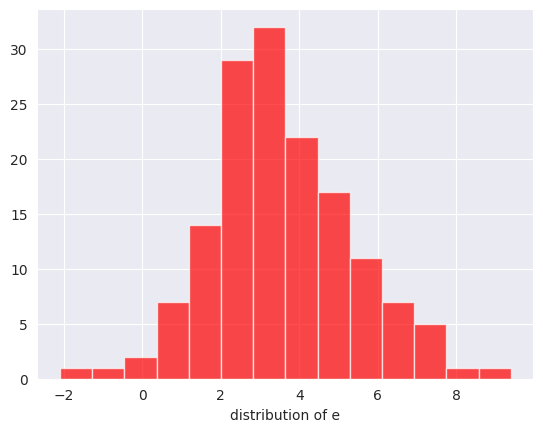

[[-1.022714455727883,
  0.628402540231324,
  -0.10291181323475618,
  0.9304307612313342,
  -1.0656722426909833,
  -2.7822197329759737,
  0.9079406578259813,
  -0.05320875943274519,
  1.5067323403855253,
  1.3312189839934376,
  -0.4421027348434702,
  0.6991270102543987,
  -0.6266094417324698,
  -1.0223316740903465,
  0.4130762334822648,
  1.4698497436101823,
  0.9982756964072548,
  -0.3292581591882242,
  -0.4618441309496009,
  -0.9685026447905021,
  1.378421642108167,
  -0.18198394690103276,
  0.9631839284053303,
  0.23040572592387593,
  1.069543976637561,
  -1.3213361014714007,
  -1.9495228373301807,
  0.5655367683578808,
  0.5770144374318814,
  -0.9935466551983507,
  -0.23468398587603684,
  -0.02246706594478572,
  0.009510056053669717,
  -0.8169722599832093,
  -0.8593988070199372,
  0.32240212627329945,
  -0.033547429041031536,
  -0.06641895639524546,
  0.6843283019399572,
  -1.706706106887504,
  0.2478176596892969,
  0.04057770209442668,
  0.5414732246511179,
  0.20561083836946864,
 

In [124]:

hscm.plot_data_resampled()

In [125]:
print(new_sampled_data)

{'a0': -0.42682781885232074, 'a1': -0.0045514764363510365, 'a2': 0.5618196876621905, 'a3': 0.05216978685601818, 'a4': -0.0045514764363510365, 'a5': -0.4014085240854269, 'a6': 1.0492874463917852, 'a7': 0.6765436743015648, 'a8': 0.6597220703278395, 'a9': -1.706706106887504, 'a10': 0.15922272784182168, 'a11': 0.9021320076884556, 'a12': 0.9982756964072548, 'a13': -1.2333808278140586, 'a14': 0.6307285147109446, 'a15': -0.09128751550139869, 'a16': -1.066831112711419, 'a17': -0.33456676622958625, 'a18': -0.4421027348434702, 'a19': 0.15922272784182168, 'a20': -1.364702118476776, 'a21': 0.5618196876621905, 'a22': -1.8715719543248797, 'a23': -0.6656758972701097, 'a24': 0.20561083836946864, 'a25': 0.11671581157155073, 'a26': 0.033782345407638754, 'a27': 1.5824812710816925, 'a28': -0.49317968462527867, 'a29': 0.6597220703278395, 'a30': -0.3793101932573099, 'a31': -1.3213361014714007, 'a32': 1.805568807219847, 'a33': 0.04057770209442668, 'a34': 0.2920107589852533, 'a35': -1.066831112711419, 'a36': 

In [126]:
save_sampled_data(new_sampled_data, 'data/resampled_data.json')

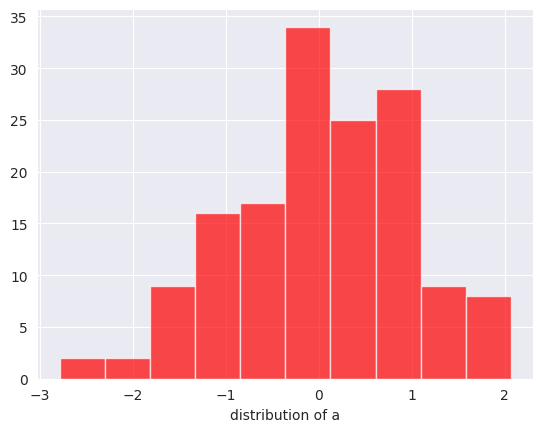

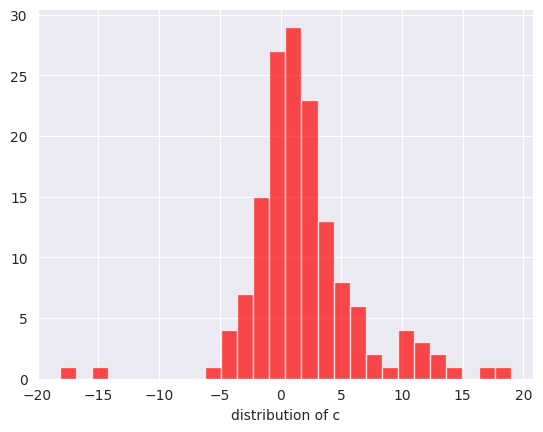

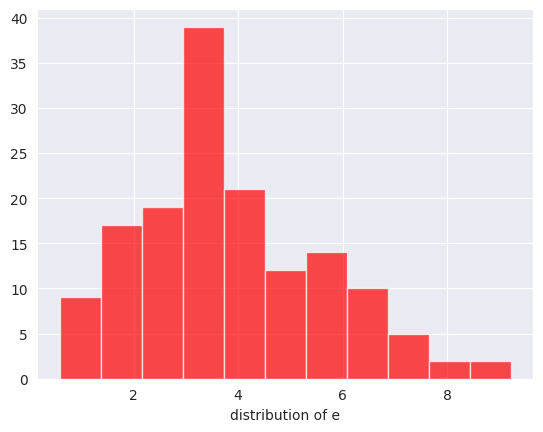

[[-1.022714455727883,
  0.628402540231324,
  -0.10291181323475618,
  0.9304307612313342,
  -1.0656722426909833,
  -2.7822197329759737,
  0.9079406578259813,
  -0.05320875943274519,
  1.5067323403855253,
  1.3312189839934376,
  -0.4421027348434702,
  0.6991270102543987,
  -0.6266094417324698,
  -1.0223316740903465,
  0.4130762334822648,
  1.4698497436101823,
  0.9982756964072548,
  -0.3292581591882242,
  -0.4618441309496009,
  -0.9685026447905021,
  1.378421642108167,
  -0.18198394690103276,
  0.9631839284053303,
  0.23040572592387593,
  1.069543976637561,
  -1.3213361014714007,
  -1.9495228373301807,
  0.5655367683578808,
  0.5770144374318814,
  -0.9935466551983507,
  -0.23468398587603684,
  -0.02246706594478572,
  0.009510056053669717,
  -0.8169722599832093,
  -0.8593988070199372,
  0.32240212627329945,
  -0.033547429041031536,
  -0.06641895639524546,
  0.6843283019399572,
  -1.706706106887504,
  0.2478176596892969,
  0.04057770209442668,
  0.5414732246511179,
  0.20561083836946864,
 

In [127]:


# Plot the new sampled data
hscm.plot_data()


KL Divergence

In [128]:
from scipy.stats import gaussian_kde # type: ignore
import tqdm

In [129]:
def kl_divergence(p, q, bandwidth='scott'):
    """
    Calcule la divergence KL entre deux distributions empiriques représentées par des tableaux,
    en utilisant l'estimation de densité par noyau.
    
    :param p: Premier tableau de données
    :param q: Second tableau de données
    :param bandwidth: Méthode pour estimer la largeur de bande ('scott', 'silverman' ou un nombre)
    :return: Valeur de la divergence KL
    """
    # Assurez-vous que les tableaux ont la même taille
    min_len = min(len(p), len(q))
    p = p[:min_len]
    q = q[:min_len]
    
    # Estimation de densité par noyau
    kde_p = gaussian_kde(p, bw_method=bandwidth)
    kde_q = gaussian_kde(q, bw_method=bandwidth)
    
    # Créez un espace d'échantillonnage
    x = np.linspace(min(np.min(p), np.min(q)), max(np.max(p), np.max(q)), 10000)
    
    # Estimez les densités
    p_density = kde_p(x)
    q_density = kde_q(x)
    
    # Ajoutez un petit epsilon pour éviter la division par zéro
    epsilon = 1e-10
    p_density += epsilon
    q_density += epsilon
    
    # Normalisez les densités
    p_density /= np.sum(p_density)
    q_density /= np.sum(q_density)
    
    # Calculez la divergence KL
    return np.sum(p_density * np.log(p_density / q_density))

In [130]:
def kl_div_deprecated(original, resampled):
    # Calculate histograms
    hist_original, _ = np.histogram(original, bins=50, density=True)
    hist_resampled, _ = np.histogram(resampled, bins=50, density=True)
        
        # Add small constant to avoid division by zero
    hist_original += 1e-10
    hist_resampled += 1e-10
        
        # Normalize
    hist_original /= hist_original.sum()
    hist_resampled /= hist_resampled.sum()
        
        # Calculate KL divergence
    kl_divs = np.sum(hist_original * np.log(hist_original / hist_resampled))
    
    return kl_divs

In [157]:

def run_experiment(k):
    results = []
    for j in tqdm.tqdm(range(k)):
        # Define the HSCM model structure
        nodes = ["a", "b", "c", "d", "e"]
        edges = [("a", "b"), ('a', 'c'), ("b", "c"), ("c", "d"), ("b", "d"), ("d", "e"),("c", "e")]
        unit_nodes = ["a", "c", "e"]
        subunit_nodes = ["d", "b"]
        sizes = [150] * 150# You can adjust this based on your data
        
        # Initialize the HSCM model
        hscm = HSCM(nodes, edges, unit_nodes, subunit_nodes, sizes, node_functions={}, data=None)
        
        # Define random functions for each node
        random_functions = {
            "a": lambda x: norm.ppf(x, 0, 1),
            "b": lambda x: norm.ppf(x, 0, 1),
            "c": lambda x: norm.ppf(x, 0, 1),
            "d": lambda x: norm.ppf(x, 0, 1),
            "e": lambda x: norm.ppf(x, 0, 1)
        }
        # Define additive functions for each node
        additive_functions = {
            "a": {},
            
            "b": {"a": lambda a: a},
            
            "c": {"a": lambda a: a**3, "b": lambda b: (np.mean(np.array(list(b))) +1)**2},
            
            "d": {"b": lambda b: b +1, "c": lambda c: -c},
            
            "e": {"d": lambda d: np.mean(np.array(list(d))) +1, "c": lambda c : np.sqrt(abs(c))}
        }
    
        # Set up the HSCM model
        hscm.additive_model(additive_functions, random_functions)
    
        # Sample data from the model
        sampled_data = hscm.sample_data()
        
        try:
            save_sampled_data(sampled_data, f'data/sampled_data_{j}.json')
        except:
            print('error')
        # Set distributions from the sampled data
        hscm.set_distribution_from_data()
    
        # Resample data
        resampled_data = hscm.resample_data_no_intervention()
        try:
            save_sampled_data(resampled_data, f'data/resampled_data_{j}.json')
        except:
            print('error')
        
        
        kl_divergences = {}
        for node in unit_nodes:
            original = [sampled_data[f"{node}{i}"] for i in range(len(sizes))]
            resampled = [resampled_data[f"{node}{i}"] for i in range(len(sizes))]
            
            kl_divergences[node] = kl_divergence(original, resampled)
            results.append(kl_divergences)
        
            
    return results

In [175]:

# Run the experiment 100 times
results = run_experiment(100)


100%|██████████| 100/100 [16:57<00:00, 10.17s/it]


if resampled, should be 0, else should be a certain value

In [176]:
print(results)

[{'a': 0.024059479704662684, 'c': 0.056843209857624845, 'e': 0.05339524541574685}, {'a': 0.024059479704662684, 'c': 0.056843209857624845, 'e': 0.05339524541574685}, {'a': 0.024059479704662684, 'c': 0.056843209857624845, 'e': 0.05339524541574685}, {'a': 0.012318699618287306, 'c': 0.019892108359366296, 'e': 0.019950247187761106}, {'a': 0.012318699618287306, 'c': 0.019892108359366296, 'e': 0.019950247187761106}, {'a': 0.012318699618287306, 'c': 0.019892108359366296, 'e': 0.019950247187761106}, {'a': 0.012348117064486238, 'c': 0.042908203297840994, 'e': 0.02628218009488259}, {'a': 0.012348117064486238, 'c': 0.042908203297840994, 'e': 0.02628218009488259}, {'a': 0.012348117064486238, 'c': 0.042908203297840994, 'e': 0.02628218009488259}, {'a': 0.016643651884079173, 'c': 0.022806803033995605, 'e': 0.037628253027414266}, {'a': 0.016643651884079173, 'c': 0.022806803033995605, 'e': 0.037628253027414266}, {'a': 0.016643651884079173, 'c': 0.022806803033995605, 'e': 0.037628253027414266}, {'a': 0.0

/tmp/ipykernel_97838/1790404846.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='KL Divergence', hue='Node', shade=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


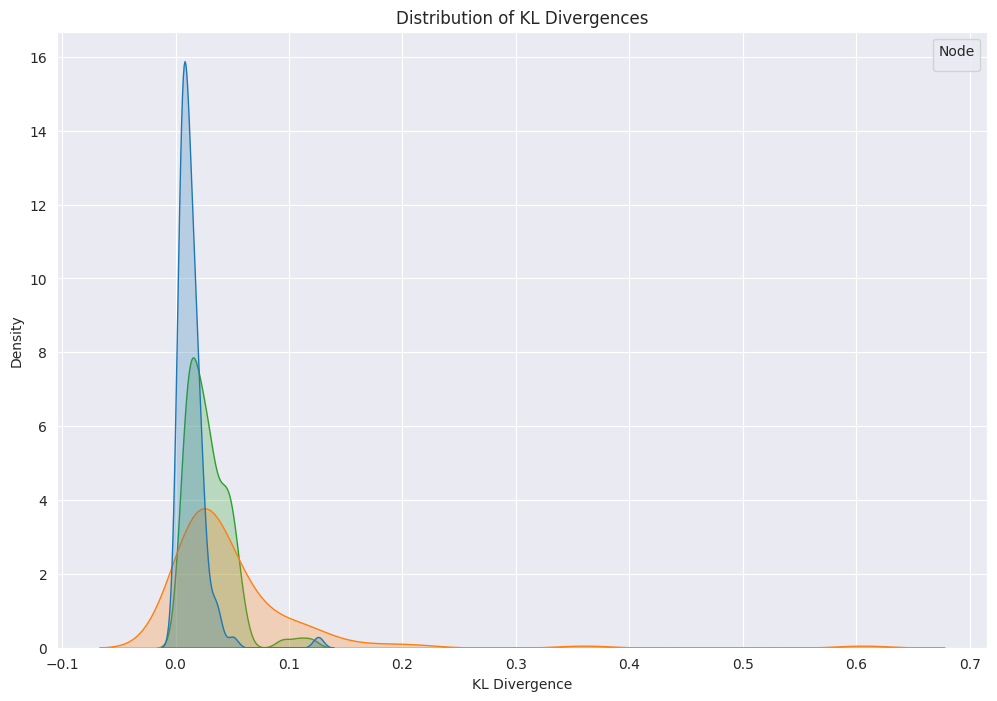

a:
  Mean: 0.0137
  Std Dev: 0.0143
  Min: 0.0010
  Max: 0.1256

c:
  Mean: 0.0518
  Std Dev: 0.0750
  Min: 0.0048
  Max: 0.6060

e:
  Mean: 0.0289
  Std Dev: 0.0203
  Min: 0.0034
  Max: 0.1197



In [177]:
# Analyze the results
import seaborn as sns
import pandas as pd

kl_divergences = {node: [result[node] for result in results] for node in results[0].keys()}

# Convert the data to a long format suitable for seaborn
df = pd.DataFrame([(node, div) for node, divs in kl_divergences.items() for div in divs],
                  columns=['Node', 'KL Divergence'])

# Plot the distribution of KL divergences for each node using KDE
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='KL Divergence', hue='Node', shade=True)
plt.xlabel('KL Divergence')
plt.ylabel('Density')
plt.title('Distribution of KL Divergences')
plt.legend(title='Node')
plt.show()

# Print summary statistics
for node, divergences in kl_divergences.items():
    print(f"{node}:")
    print(f"  Mean: {np.mean(divergences):.4f}")
    print(f"  Std Dev: {np.std(divergences):.4f}")
    print(f"  Min: {np.min(divergences):.4f}")
    print(f"  Max: {np.max(divergences):.4f}")
    print()

AUC

In [178]:

def load_data_from_json(file_path):
    """
    Load data from a JSON file and return it as a dictionary.
    
    :param file_path: Path to the JSON file
    :return: Dictionary containing the loaded data
    """
    try:
        with open(file_path, 'r') as file:
            data = json.load(file)
        print(f"Data successfully loaded from {file_path}")
        return data
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None
    except json.JSONDecodeError:
        print(f"Error: Invalid JSON format in {file_path}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {str(e)}")
        return None



In [179]:

# Specify the path to your JSON file
json_file_path = 'data/sampled_data.json'

# Load the data
data_dict = load_data_from_json(json_file_path)

# Check if data was loaded successfully
if data_dict is not None:
    print("Data loaded successfully. You can now use data_dict in your analysis.")
else:
    print("Failed to load data. Please check the file path and format.")


Data successfully loaded from data/sampled_data.json
Data loaded successfully. You can now use data_dict in your analysis.


In [180]:
data_dict_resampled = load_data_from_json('data/resampled_data.json')

Data successfully loaded from data/resampled_data.json


In [181]:
def create_vector(data, sizes):
    vectors = []
    current_index = 0
    for i, size in enumerate(sizes):
        for j in range(size):
            vector = [
                #data[f'a{i}'],  # Unit node 'a' for the school
                data[f'_b{i}_{j}'],  # Subunit node 'b' for this specific child
                #data[f'c{i}'],  # Unit node 'c' for the school
                data[f'_d{i}_{j}'],  # Subunit node 'd' for this specific child
                #data[f'e{i}']   # Unit node 'e' for the school
            ]
            vectors.append(vector)
            current_index += 1
    return np.array(vectors)



In [182]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier


In [183]:
def hscm_classification_pipeline(X, y):
    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a KNN classifier
    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]

    # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    # Calculate and print AUC-ROC score
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    print(f"AUC-ROC Score: {auc_roc:.2f}")

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    return accuracy, auc_roc


In [184]:

original_vectors = create_vector(data_dict, sizes)
new_vectors = create_vector(data_dict_resampled, sizes)
X = np.vstack((original_vectors, new_vectors))
y = np.array([0]*len(original_vectors) + [1]*len(new_vectors))  # 0 for original, 1 for new


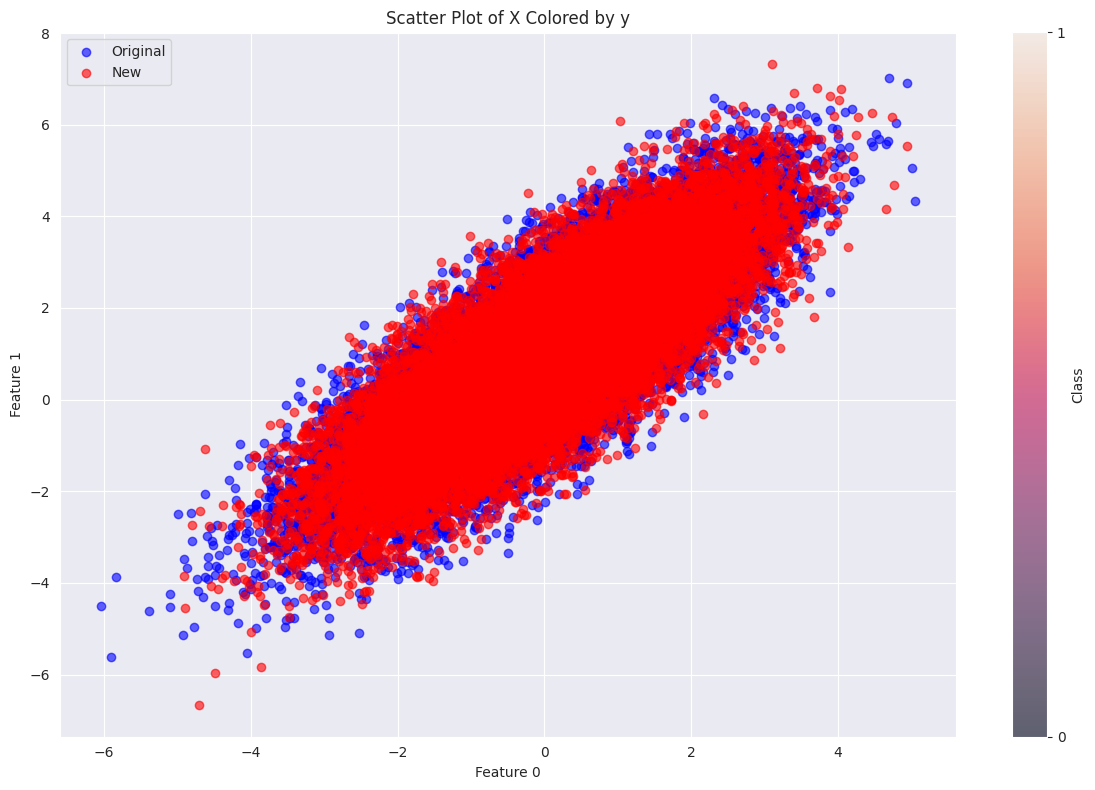

In [185]:
# Plotting X according to its color in y

# Create a scatter plot
plt.figure(figsize=(12, 8))

# Plot points for y=0 (original vectors)
plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', label='Original', alpha=0.6)

# Plot points for y=1 (new vectors)
plt.scatter(X[y==1, 0], X[y==1, 1], c='red', label='New', alpha=0.6)

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Scatter Plot of X Colored by y')
plt.legend()

# Add a colorbar
plt.colorbar(ticks=[0, 1], label='Class')

plt.tight_layout()
plt.show()


In [186]:
hscm_classification_pipeline(X, y)

Accuracy: 0.50
AUC-ROC Score: 0.50
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      4507
           1       0.50      0.50      0.50      4493

    accuracy                           0.50      9000
   macro avg       0.50      0.50      0.50      9000
weighted avg       0.50      0.50      0.50      9000



(0.5014444444444445, 0.5000840495860954)

In [187]:
def run_classification(k):
    list = []
    for i in range(k):
        print(i)
        data_dict = load_data_from_json(f'data/sampled_data_{i}.json')
        data_dict_resampled = load_data_from_json(f'data/resampled_data_{i}.json') 
        print(data_dict, data_dict_resampled)
        original_vectors = create_vector(data_dict, sizes)
        new_vectors = create_vector(data_dict_resampled, sizes)
        X = np.vstack((original_vectors, new_vectors))
        y = np.array([0]*len(original_vectors) + [1]*len(new_vectors))  # 0 for original, 1 for new
        accuracy_score,auc_score= hscm_classification_pipeline(X, y)
        list.append((accuracy_score,auc_score))
    return list

In [188]:
liste = run_classification(100)

0
Data successfully loaded from data/sampled_data_0.json
Data successfully loaded from data/resampled_data_0.json
{'a0': 0.7198898533120263, 'a1': -0.7203406088877703, 'a2': 0.43414786589734133, 'a3': 0.47565998776114765, 'a4': -0.845458102973086, 'a5': 0.21118472955760623, 'a6': 0.9899606116106336, 'a7': -1.0481955860615195, 'a8': 1.3242624574134794, 'a9': -0.7900919859569309, 'a10': 0.1045651716266219, 'a11': -0.4327114956012405, 'a12': -1.6457512112546862, 'a13': -0.11715309270217783, 'a14': 0.9144638750632851, 'a15': 0.15822626202867435, 'a16': -0.7546595877814406, 'a17': -0.7712970734835706, 'a18': 0.6245517675080654, 'a19': 0.24388205614124572, 'a20': -1.1258088728371138, 'a21': -0.36328791706566493, 'a22': 1.3406467134174933, 'a23': -0.3890137904652421, 'a24': -0.3203851257770652, 'a25': -1.1108487570512298, 'a26': -0.846542153876938, 'a27': 0.9799634795963024, 'a28': 0.6529428170363112, 'a29': -0.4956201905325692, 'a30': -0.4438124562905944, 'a31': -0.5442451896421037, 'a32': 0

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Accuracy: 0.50
AUC-ROC Score: 0.50
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.51      0.51      4507
           1       0.50      0.50      0.50      4493

    accuracy                           0.50      9000
   macro avg       0.50      0.50      0.50      9000
weighted avg       0.50      0.50      0.50      9000



In [189]:
print(liste)

[(0.5194444444444445, 0.5213844221153918), (0.49955555555555553, 0.5000129136114947), (0.5062222222222222, 0.5016159051446594), (0.49622222222222223, 0.49738547515497694), (0.5007777777777778, 0.5048605302798017), (0.5053333333333333, 0.5017630906859972), (0.5043333333333333, 0.5056134456819179), (0.4945555555555556, 0.4935724782741449), (0.5105555555555555, 0.510007431622921), (0.5055555555555555, 0.5069017204041629), (0.503, 0.5046063321338407), (0.5064444444444445, 0.5056213469356049), (0.5067777777777778, 0.5071095233761307), (0.49655555555555553, 0.49675159707793864), (0.48644444444444446, 0.4853427793479599), (0.5083333333333333, 0.5100948886246688), (0.49877777777777776, 0.49589433574431857), (0.49644444444444447, 0.4955364089522982), (0.49922222222222223, 0.4991822202433971), (0.5066666666666667, 0.5110130143030964), (0.4935555555555556, 0.4894770115740033), (0.495, 0.49682421453760556), (0.49933333333333335, 0.49967306093728325), (0.5096666666666667, 0.5070337207235711), (0.50

In [ ]:
print(np.mean(np.array(liste), axis=0))

[0.50215667 0.5024722 ]


In [191]:
print(np.std(np.array(liste)))

0.0054896264746432675
